# Histogram Plotting: NumPy, Pandas, Matplotlib & Seaborn

## Histogram Plotting Python 

In [1]:
a = (0, 1, 1, 1, 2, 3, 7, 7, 23)
a

(0, 1, 1, 1, 2, 3, 7, 7, 23)

In [2]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(a)
counted

{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

In [4]:
from collections import Counter
recounted = Counter(a)
recounted

Counter({0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1})

In [5]:
recounted.items() == counted.items()

True

In [22]:
def ascii_histogram(seq) -> None:
    counted = count_elements(seq)
    for k in sorted(counted):
        print('{0:5d} {1}'.format(k, '■' * counted[k])) #Ascii character Alt + 254 = ■

In [23]:
import random
random.seed(1)
vals = [1, 3, 4, 6, 8, 9, 10]
freq = (random.randint(5, 15) for _ in vals)

data = []
for f, v in zip(freq, vals):
    data.extend([v] * f)
ascii_histogram(data)

    1 ■■■■■■■
    3 ■■■■■■■■■■■■■■
    4 ■■■■■■
    6 ■■■■■■■■■
    8 ■■■■■■
    9 ■■■■■■■■■■■■
   10 ■■■■■■■■■■■■


## Histogram Plotting NumPy

In [30]:
import numpy as np
np.random.seed(444)
np.set_printoptions(precision=3)

d = np.random.laplace(loc=15, scale=3, size=500)
d[:5]

array([18.406, 18.087, 16.004, 16.221,  7.358])

In [31]:
hist, bin_edges = np.histogram(d)
hist

array([ 13,  23,  91, 261,  80,  21,   7,   2,   1,   1], dtype=int64)

In [32]:
bin_edges

array([ 2.11 ,  5.874,  9.638, 13.402, 17.166, 20.93 , 24.694, 28.458,
       32.222, 35.986, 39.749])

In [33]:
hist.size, bin_edges.size

(10, 11)

In [35]:
first_edge, last_edge = d.min(), d.max()

In [37]:
n_equal_bins = 10  # NumPy's default
bin_edges = np.linspace(start=first_edge, stop=last_edge,
                        num=n_equal_bins + 1, endpoint=True)
bin_edges

array([ 2.11 ,  5.874,  9.638, 13.402, 17.166, 20.93 , 24.694, 28.458,
       32.222, 35.986, 39.749])

In [38]:
hist.size, bin_edges.size

(10, 11)

(0.0, 80.0)

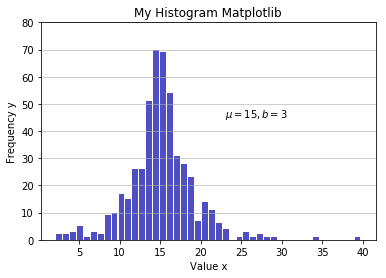

In [51]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value x')
plt.ylabel('Frequency y')
plt.title('My Histogram Matplotlib')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

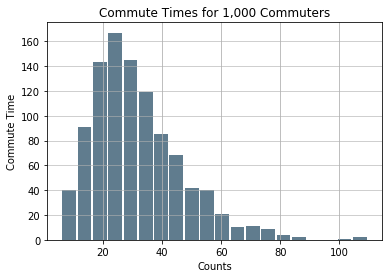

In [52]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

## Plotting a Kernel Density Estimate (KDE) 

In [54]:
# Sample from two different normal distributions
means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
    columns=['A', 'B'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,A,B
min,-4.15,13.73
max,24.06,26.07
mean,9.87,20.10
std,3.82,2.00


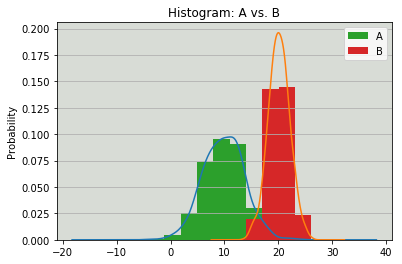

In [55]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

Text(-2,0.35,'$f(x) = \\frac{\\exp(-x^2/2)}{\\sqrt{2*\\pi}}$')

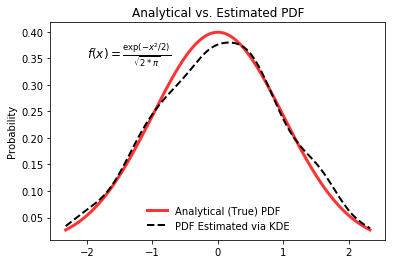

In [57]:
from scipy import stats

# Defaults to the standard normal distribution, N~(0, 1)
dist = stats.norm()

# This is just a sample, so the mean and std. 
# deviation should be close to (1, 0).
samp = dist.rvs(size=1000)

# `ppf()`: percent point function (inverse of cdf — percentiles).
x = np.linspace(start=stats.norm.ppf(0.01),
                stop=stats.norm.ppf(0.99), num=250)
gkde = stats.gaussian_kde(dataset=samp)

# `gkde.evaluate()` estimates the PDF itself.
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid', c='red', lw=3,
        alpha=0.8, label='Analytical (True) PDF')
ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='black', lw=2,
        label='PDF Estimated via KDE')
ax.legend(loc='best', frameon=False)
ax.set_title('Analytical vs. Estimated PDF')
ax.set_ylabel('Probability')
ax.text(-2., 0.35, r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$',
        fontsize=12)

## A Fancy Alternative with Seaborn 

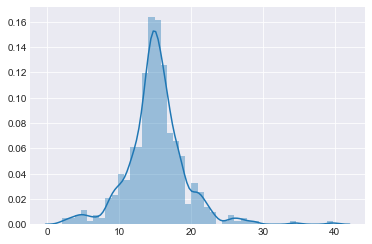

In [58]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(d)

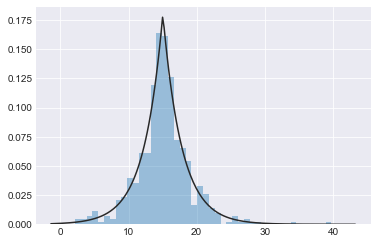

In [59]:
sns.distplot(d, fit=stats.laplace, kde=False)

## Pandas 

In [60]:
import pandas as pd
data = np.random.choice(np.arange(10), size=10000,
                        p=np.linspace(1, 11, 10) / 60)

s = pd.Series(data)
s.value_counts()
s.value_counts(normalize=True).head()

9    0.1822
8    0.1673
7    0.1426
6    0.1271
5    0.1144
dtype: float64

In [61]:
ages = pd.Series([1, 1, 3, 5, 8, 10, 12, 15, 18, 18, 19, 20, 25, 30, 40, 51, 52])
bins = (0, 10, 13, 18, 21, np.inf)  # The edges
labels = ('child', 'preteen', 'teen', 'military_age', 'adult')
groups = pd.cut(ages, bins=bins, labels=labels)

In [62]:
groups.value_counts()

child           6
adult           5
teen            3
military_age    2
preteen         1
dtype: int64

In [63]:
pd.concat((ages, groups), axis=1).rename(columns={0: 'age', 1: 'group'})

,age,group
0,1,child
1,1,child
2,3,child
3,5,child
4,8,child
5,10,child
6,12,preteen
7,15,teen
8,18,teen
9,18,teen


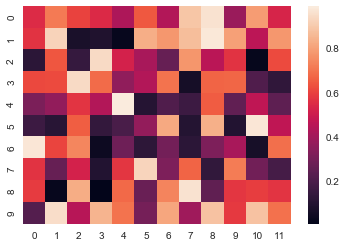

In [65]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

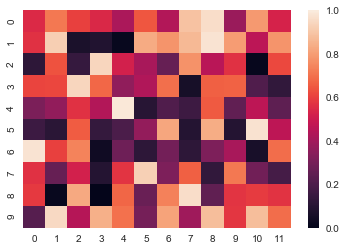

In [66]:
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

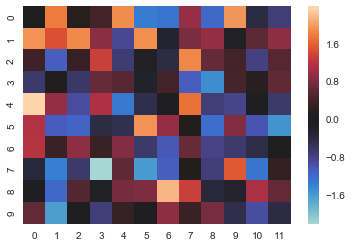

In [67]:
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)

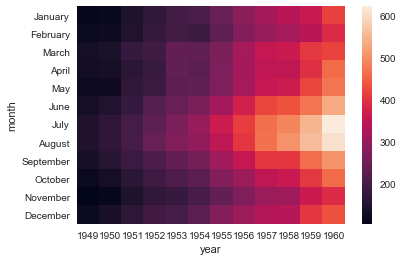

In [68]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

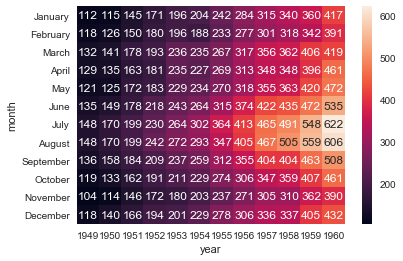

In [69]:
ax = sns.heatmap(flights, annot=True, fmt="d")

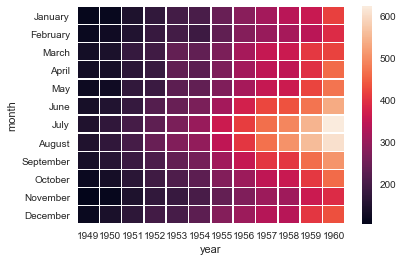

In [70]:
ax = sns.heatmap(flights, linewidths=.5)

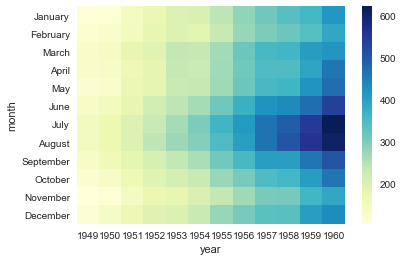

In [71]:
ax = sns.heatmap(flights, cmap="YlGnBu")

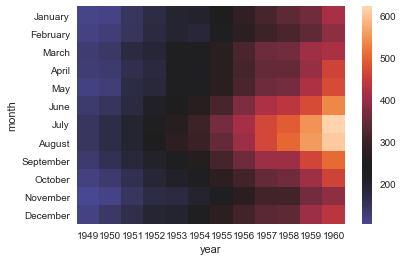

In [72]:
ax = sns.heatmap(flights, center=flights.loc["January", 1955])

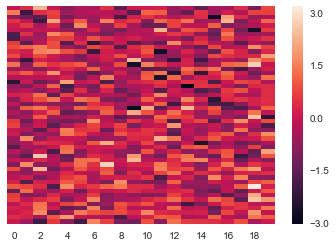

In [73]:
data = np.random.randn(50, 20)
ax = sns.heatmap(data, xticklabels=2, yticklabels=False)

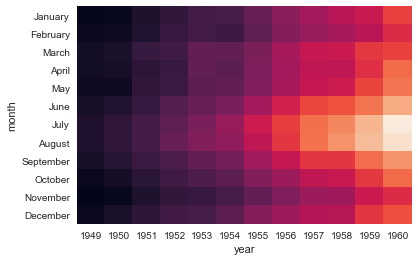

In [74]:
ax = sns.heatmap(flights, cbar=False)

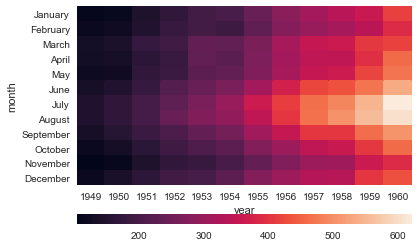

In [75]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

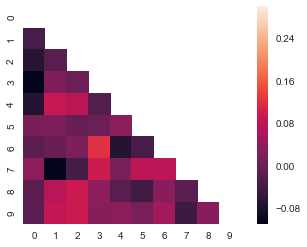

In [76]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)